import packages and self written classes and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from neural_network import *
from optimizers import *
from mnist_functions import *
import sys

import warnings
warnings.filterwarnings("ignore")

Load and preprocess data

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

# Extract data (features) and target (labels)
X = mnist.data
y = mnist.target

#one hot encoding
encoder = OneHotEncoder(sparse_output=False)

# 4. Fit and transform the labels
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
# Scaling
X = X/255.0

output_size = 10
# train test split

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y_onehot, test_size=10000, random_state=42
)

# Split train+val into train (50k) and validation (10k)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=10000, random_state=42
)

Tune learning rate and regularization parameter simultaneously

On the x axis are the different regularization parameters and on the y axis are different learning rates


time
           0.000100   0.001778   0.031623   0.562341   10.000000
0.000100    2.147921   1.500664   1.564594   1.258588   1.179015
0.001778    1.142650   1.190728   1.218868   1.121801   1.124890
0.031623    1.220759   1.178170   1.107308   1.103539   1.131345
0.562341    1.348726   1.336716   1.221777   1.125914   1.092000
10.000000   1.084310   1.045475   1.055025   1.292968   1.244459
result
           0.000100   0.001778   0.031623   0.562341   10.000000
0.000100      0.0953     0.1002     0.0650     0.1207     0.1338
0.001778      0.5756     0.6226     0.5775     0.4918     0.1689
0.031623      0.8026     0.8553     0.8307     0.9217     0.4383
0.562341      0.1070     0.1070     0.0966     0.0885     0.1070
10.000000     0.0997     0.0997     0.0997     0.0997     0.0988


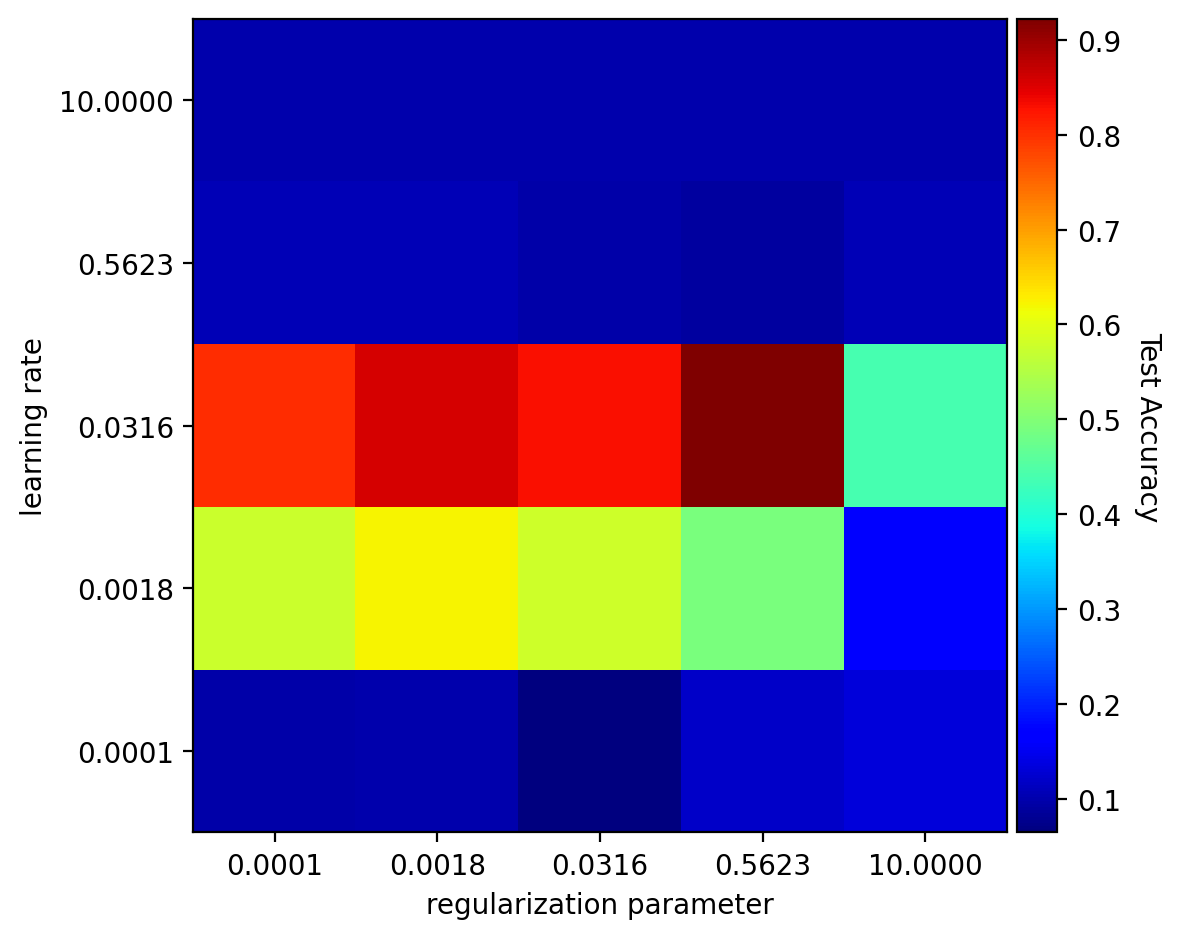

,0.000100,0.001778,0.031623,0.562341,10.000000
0.000100,0.0953,0.1002,0.0650,0.1207,0.1338
0.001778,0.5756,0.6226,0.5775,0.4918,0.1689
0.031623,0.8026,0.8553,0.8307,0.9217,0.4383
0.562341,0.1070,0.1070,0.0966,0.0885,0.1070
10.000000,0.0997,0.0997,0.0997,0.0997,0.0988


In [ ]:
np.random.seed(472)
layer_output_sizes = [128, 64, 32, output_size]
activation_funcs = [ReLU, sigmoid, sigmoid, softmax]
list_lambda = np.logspace(-4,1,5)
list_learning_rates = np.logspace(-4,1,5) 
epochs = 1 #Lars 100
tune_learning_rate_reg(X_train, y_train, X_val, y_val, layer_output_sizes, activation_funcs, list_learning_rates, list_lambda, epochs=epochs)

Compare different activation functions

On the x axis are different regularization parameters and on the y axis the different models

model 1: ReLU, sigmoid, sigmoid

model 2: ReLU, sigmoid, ReLU

model 3: sigmoid, sigmoid, sigmoid


In [ ]:
np.random.seed(209)
layer_output_sizes = [128, 64, 32, output_size]
list_activation_funcs = [[ReLU, sigmoid, sigmoid, softmax], [ReLU, sigmoid, ReLU, softmax], [sigmoid, sigmoid, sigmoid, softmax]]
list_model_numbers = [1,2,3]
list_regularization = np.logspace(-4,1,5)
epochs = 1 #Lars 100
compare_activation_reg(X_train, y_train, X_val, y_val, layer_output_sizes, list_activation_funcs, list_model_numbers, list_regularization, epochs)

--------------------------------------------------
times:
   0.000100   0.001778   0.031623   0.562341   10.000000
1   1.336412   1.223907   1.218098   1.296577   1.226840
2   1.190013   1.167242   1.263656   1.025831   0.931296
3   1.089079   1.112279   1.281793   1.244015   1.177248
accuraccy
   0.000100   0.001778   0.031623   0.562341   10.000000
1     0.8311     0.8302     0.8342     0.9224     0.3890
2     0.7578     0.3896     0.7164     0.7177     0.7701
3     0.9041     0.9106     0.9259     0.9026     0.0988
--------------------------------------------------
accuraccy of best learning rate
1    0.9224
2    0.7701
3    0.9259
dtype: float64


,0.000100,0.001778,0.031623,0.562341,10.000000
1,0.8311,0.8302,0.8342,0.9224,0.3890
2,0.7578,0.3896,0.7164,0.7177,0.7701
3,0.9041,0.9106,0.9259,0.9026,0.0988


Plot errors per epoch

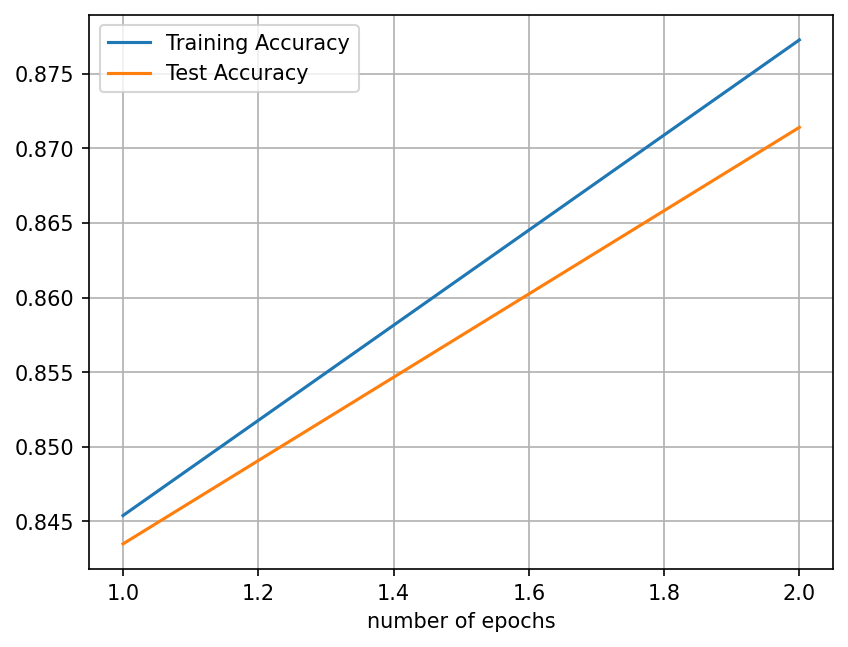

In [ ]:
np.random.seed(120)
layer_output_sizes = [128, 64, output_size]
activation_funcs = [ReLU, sigmoid, softmax]
lmbda = 0
epochs= 2 #Lars 200
compute_errors_per_epoch(X_train, y_train, X_val, y_val, layer_output_sizes, activation_funcs, lmbda, epochs)

Compare the number of hidden layers while using regularization

On the x axis are different regularization parameters and on the y axis the different models

model 1: 1 hidden layer

model 2: 2 hidden layer

model 3: 3 hidden layer

model 4: 4 hidden layer


In [ ]:
np.random.seed(123)
list_layer_output_sizes = [[128, output_size], [128, 64, output_size], [128, 64, 32, output_size], [128, 64, 32, 16, output_size]]   # define number of nodes in layers
list_activation_funcs = [[ReLU, softmax], [ReLU, sigmoid, softmax], [ReLU, sigmoid, sigmoid, softmax], [ReLU, sigmoid, sigmoid, sigmoid, softmax]]    # activation functions
number_hidden_layers =[1,2,3,4]
list_regularization = np.logspace(-4,1,7)
list_regularization = np.insert(list_regularization,0,0)
epochs=1 #Lars 100
results_hidden_layer_reg = tune_hidden_layers_reg(X_train, y_train, X_val, y_val, list_layer_output_sizes, list_activation_funcs, number_hidden_layers, list_regularization, epochs=epochs)

--------------------------------------------------
times:
   0.000000   0.000100   0.000681   0.004642   0.031623   0.215443   \
1   0.988645   0.866308   0.801402   0.763433   0.799037   0.738171   
2   0.870513   0.899116   0.889286   0.995681   0.963714   0.894817   
3   0.941589   0.991179   0.969985   1.018945   1.138109   0.953503   
4   1.051375   1.051031   1.032191   1.010189   1.102705   1.157191   

   1.467799   10.000000  
1   0.736274   0.730248  
2   0.880653   0.875753  
3   0.960524   1.051231  
4   1.098319   0.991013  
accuraccy
   0.000000   0.000100   0.000681   0.004642   0.031623   0.215443   \
1     0.8824     0.8777     0.8781     0.8935     0.8787     0.8962   
2     0.8470     0.8293     0.8381     0.8470     0.8535     0.8800   
3     0.8468     0.8345     0.8221     0.8303     0.8715     0.9189   
4     0.7591     0.7858     0.8284     0.7411     0.8464     0.8894   

   1.467799   10.000000  
1     0.8900     0.8881  
2     0.9215     0.7903  
3     0.8982

Compare number of nodes while using regularization

On the x axis are different regularization parameters and on the y axis the different models

model 512: 512 and 256 nodes

model 256: 256 and 128 nodes

model 128: 128 and 64 nodes

model 64: 64 and 32 nodes


In [ ]:
np.random.seed(123)
list_layer_output_sizes = [[512, 256, output_size], [256, 128, output_size], [128, 64, output_size], [64, 32, output_size], [32, 16, output_size]]   # define number of nodes in layers
activation_funcs = [ReLU, sigmoid, softmax]
list_highest_size=[512, 256, 128, 64, 32]
list_regularization = np.logspace(-4,1,7)
list_regularization = np.insert(list_regularization,0,0)
epochs = 1 #Lars 100
results_nodes_reg = tune_number_nodes_reg(X_train, y_train, X_val, y_val, list_layer_output_sizes, activation_funcs, list_highest_size, list_regularization, epochs=epochs)

accuraccy of 0is0.7587
took 6.5478 seconds
accuraccy of 0is0.7847
took 6.8944 seconds
accuraccy of 0is0.7366
took 7.6392 seconds
accuraccy of 0is0.7821
took 7.6961 seconds
accuraccy of 0is0.7342
took 6.6008 seconds
accuraccy of 0is0.8308
took 6.0980 seconds
accuraccy of 0is0.8852
took 6.2168 seconds
accuraccy of 0is0.7662
took 5.9951 seconds
accuraccy of 1is0.8232
took 2.4097 seconds
accuraccy of 1is0.8325
took 2.3392 seconds
accuraccy of 1is0.8275
took 2.6849 seconds
accuraccy of 1is0.7798
took 2.7663 seconds
accuraccy of 1is0.808
took 2.7095 seconds
accuraccy of 1is0.858
took 2.5201 seconds
accuraccy of 1is0.9031
took 2.6024 seconds
accuraccy of 1is0.7641
took 2.5142 seconds
accuraccy of 2is0.8474
took 0.9393 seconds
accuraccy of 2is0.8565
took 0.8986 seconds
accuraccy of 2is0.8564
took 0.9079 seconds
accuraccy of 2is0.8434
took 0.9101 seconds
accuraccy of 2is0.8523
took 0.9013 seconds
accuraccy of 2is0.8638
took 1.0659 seconds
accuraccy of 2is0.8795
took 0.9408 seconds
accuraccy of 

Compare the best models so far

model 1: 256 128 64

model 2: 128 64 32

model 3: 256 128


In [ ]:
np.random.seed(213)
list_numbers = [1,2,3]
list_regularization = np.logspace(-3,-1, 7)
list_layer_output_sizes = [[256, 128, 64, output_size], [128, 64, 32, output_size],[256, 128, output_size]]
list_activation_funcs = [[ReLU, sigmoid, sigmoid, softmax], [ReLU, sigmoid, sigmoid, softmax], [ReLU, sigmoid, softmax]]
epochs = 1 #Lars 100
compare_best_models(X_train, y_train, X_test, y_test, list_layer_output_sizes, list_activation_funcs, list_numbers, list_regularization, epochs)


--------------------------------------------------
times:
   0.001000  0.002154  0.004642  0.010000  0.021544  0.046416  0.100000
1  3.900115  2.970545  3.199057  2.541175  2.389461  2.373838  2.542683
2  0.931954  0.905412  0.920629  0.901571  0.914069  0.935120  0.901721
3  2.510475  2.566074  2.596637  2.498738  2.534766  2.317786  2.611988
accuraccy
   0.001000  0.002154  0.004642  0.010000  0.021544  0.046416  0.100000
1    0.7413    0.7821    0.7847    0.8073    0.8058    0.8142    0.8237
2    0.8245    0.8180    0.8067    0.8314    0.8267    0.7903    0.8683
3    0.8377    0.8182    0.8137    0.8187    0.8465    0.8122    0.8173
--------------------------------------------------
accuraccy of best learning rate
1    0.8237
2    0.8683
3    0.8465
dtype: float64


Train and evaluate the best model

accuraccy0.8585


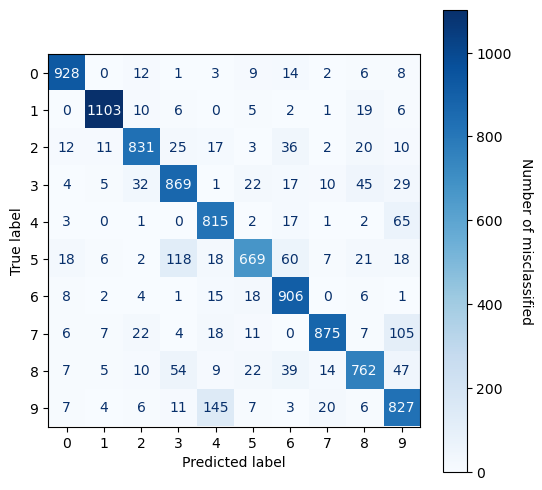

In [ ]:
np.random.seed(329)
layer_output_sizes = [128, 64, 32, output_size]
activation_funcs = [ReLU, sigmoid, sigmoid, softmax]
lmbda = 0.021544
epochs = 1 #Lars 100
train_and_evaluate_best_model(X_trainval, y_trainval, X_test, y_test, layer_output_sizes, activation_funcs, lmbda, epochs)